<a href="https://colab.research.google.com/github/abhisheksharma712/employee-turnover-/blob/main/possum_classification_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv('/content/possum.csv')

In [108]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [109]:
df.shape

(104, 14)

In [110]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   tail      104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [111]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [112]:
# impute value of age and footlgth
df['age'].fillna(df['age'].mean(),inplace=True)

In [113]:
df['footlgth'].fillna(df['footlgth'].mean(), inplace=True)


In [114]:
# convert the male and female value  to numeric
df['sex'].value_counts()

sex
m    61
f    43
Name: count, dtype: int64

In [115]:
df['sex']=df['sex'].map({'m':1,'f':0})
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
0,1,1,Vic,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


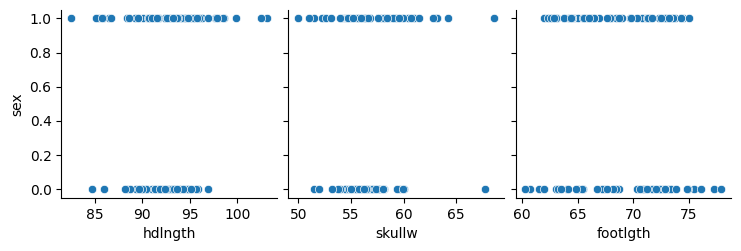

In [116]:
# regression plot
plt.rcParams['figure.figsize'] = [12, 6]
sns.pairplot(df, x_vars=['hdlngth', 'skullw', 'footlgth'], y_vars=['sex'], kind='scatter')
plt.show()


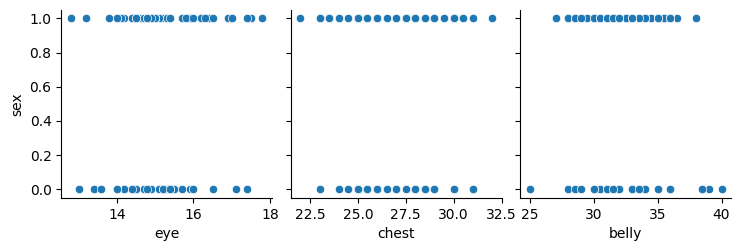

In [117]:
sns.pairplot(df, x_vars=['eye', 'chest', 'belly'], y_vars=['sex'], kind='scatter')
plt.show()

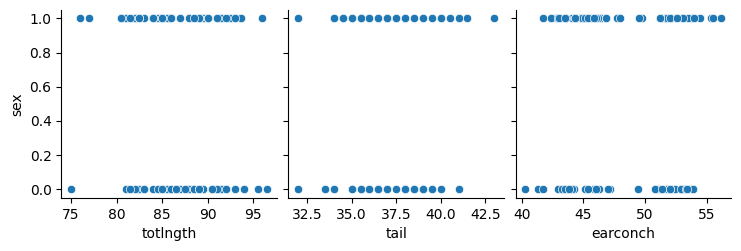

In [118]:
sns.pairplot(df, x_vars=['totlngth', 'tail', 'earconch'], y_vars=['sex'], kind='scatter')
plt.show()

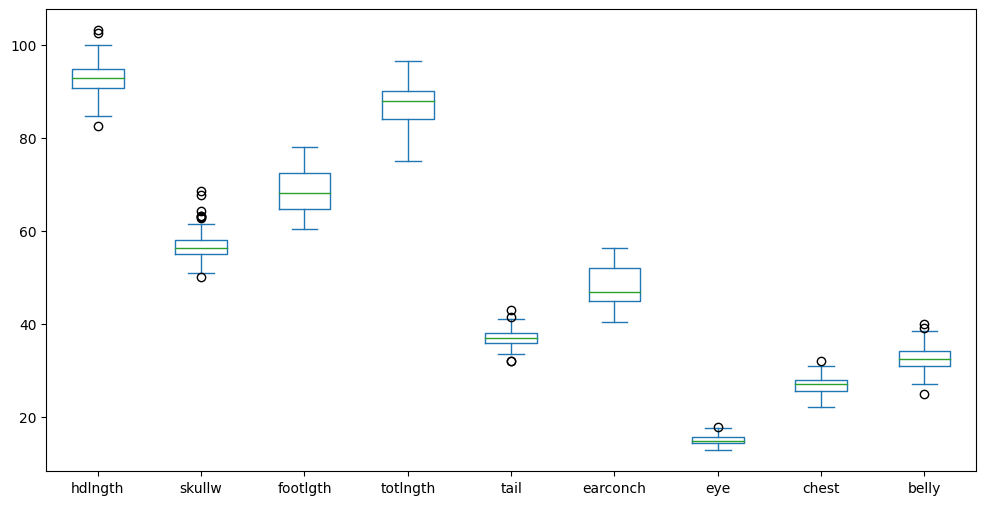

In [119]:
# oulier detection
ax=df[['hdlngth','skullw','footlgth','totlngth','tail','earconch','eye','chest','belly']].plot(kind='box')

In [120]:
def outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    outliers = x[(x < (q1 - 1.5 * IQR)) | (x > (q3 + 1.5 * IQR))]
    lwr = q1 - 1.5 * IQR
    upr = q3 + 1.5 * IQR
    return outliers, lwr, upr

out_hdlen, lwr_range, upr_range = outliers(df['hdlngth'])
print('number of outliers:',len(out_hdlen))
print('lower range:', lwr_range)
print('upper range:', upr_range)


number of outliers: 3
lower range: 84.6
upper range: 100.79999999999998


In [121]:
df.drop(df[(df['hdlngth']<lwr_range) | (df['hdlngth']>upr_range)].index,inplace=True)

In [122]:
out_hdlen, lwr_range_s, upr_range_s = outliers(df['skullw'])
df.drop(df[(df['skullw']<lwr_range_s) | (df['skullw']>upr_range_s)].index,inplace=True)

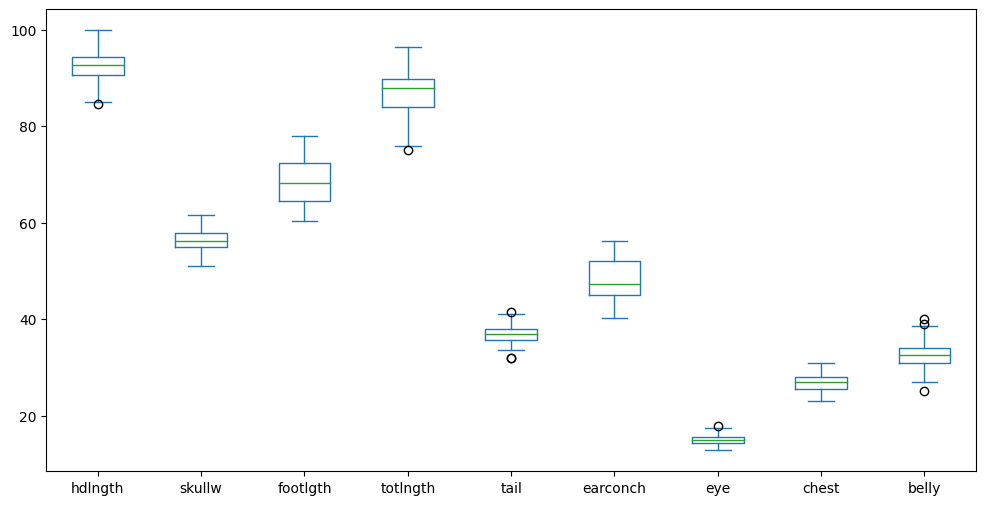

In [126]:
# oulier detection
ax=df[['hdlngth','skullw','footlgth','totlngth','tail','earconch','eye','chest','belly']].plot(kind='box')

In [127]:
X=df.drop(['case','site','Pop','sex'],axis=1)
y=df['sex']

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
X.head()

,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Classification model

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Corrected typo here
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [136]:
# Decision tree
clf = DecisionTreeClassifier()  # Instantiate the DecisionTreeClassifier class
clf.fit(X_train, y_train)  # Call the fit method with the training data
clf.score(X_train,y_train)

1.0

In [139]:
%%time
pred=clf.predict(X_test)
pred

CPU times: user 2.92 ms, sys: 1.01 ms, total: 3.93 ms
Wall time: 8.27 ms


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1])

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.5172413793103449

In [143]:
# Random Forest
clf=RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5517241379310345

In [144]:
%%time
pred=clf.predict(X_test)
pred

CPU times: user 5.91 ms, sys: 0 ns, total: 5.91 ms
Wall time: 16 ms


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0])

In [147]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.5517241379310345

In [149]:
# Logistic R
clf=LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
pred=clf.predict(X_test)
pred
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.5862068965517241

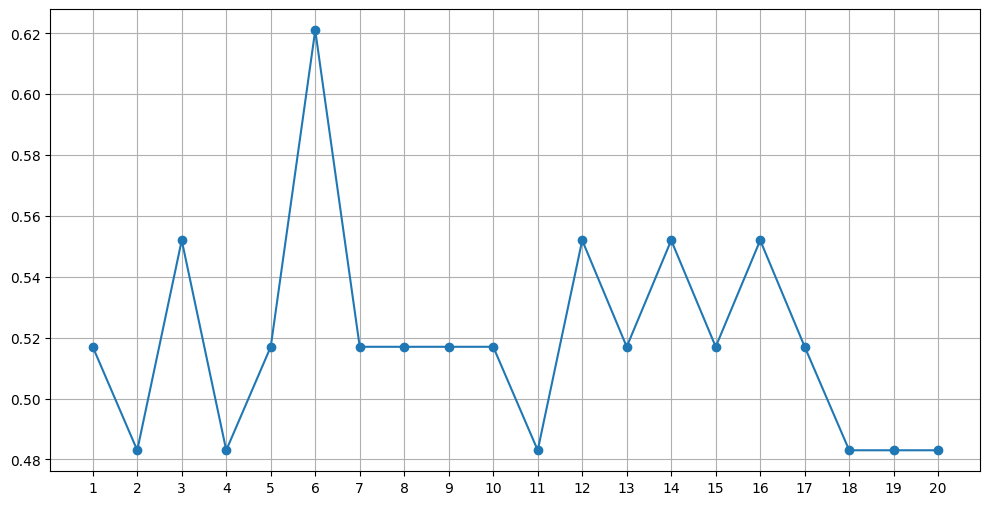

In [152]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    wcss.append(round(knn.score(X_test, y_test), 3))

plt.plot(range(1, 21), wcss, marker='o')
plt.xticks(range(1, 21, 1))
plt.grid()
plt.show()


In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)



0.696969696969697

In [155]:
%%time
pred=knn.predict(X_test)
pred

CPU times: user 8.71 ms, sys: 975 µs, total: 9.68 ms
Wall time: 16.8 ms


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0])

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6206896551724138

In [157]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,pred)

array([[11,  1],
       [10,  7]])

In [158]:
acc=18/29
acc

0.6206896551724138

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.52      0.92      0.67        12
           1       0.88      0.41      0.56        17

    accuracy                           0.62        29
   macro avg       0.70      0.66      0.61        29
weighted avg       0.73      0.62      0.60        29



In [161]:
# Grid search cv
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [162]:
tuned_parameters=[{ 'n_estimators':range(2,50),'criterion':['gini','entropy']}]
dt=RandomForestClassifier()
grid=GridSearchCV(estimator=dt,param_grid=tuned_parameters)
grid.fit(X_train,y_train)
grid.best_params_,grid.best_score_

({'criterion': 'gini', 'n_estimators': 29}, 0.712087912087912)

In [164]:
rank_test_score=pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
rank_test_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.079312,0.009806,0.007076,0.000886,gini,29,"{'criterion': 'gini', 'n_estimators': 29}",0.714286,0.692308,0.769231,0.615385,0.769231,0.712088,0.057058,1
41,0.224745,0.012970,0.014665,0.004736,gini,43,"{'criterion': 'gini', 'n_estimators': 43}",0.571429,0.846154,0.692308,0.461538,0.923077,0.698901,0.170042,2
95,0.228498,0.027112,0.016661,0.008180,entropy,49,"{'criterion': 'entropy', 'n_estimators': 49}",0.571429,0.846154,0.769231,0.461538,0.846154,0.698901,0.155501,2
37,0.098857,0.002420,0.007319,0.000278,gini,39,"{'criterion': 'gini', 'n_estimators': 39}",0.642857,0.769231,0.615385,0.538462,0.923077,0.697802,0.134946,4
38,0.105712,0.009811,0.007844,0.000409,gini,40,"{'criterion': 'gini', 'n_estimators': 40}",0.571429,0.846154,0.692308,0.461538,0.846154,0.683516,0.151537,5


In [166]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = [{'n_estimators': range(2, 50), 'criterion': ['gini', 'entropy']}]
dt=RandomForestClassifier()
grid = RandomizedSearchCV(estimator=dt, param_distributions=tuned_parameters,n_iter=30,scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_


({'n_estimators': 34, 'criterion': 'gini'}, 0.6538461538461539)

In [167]:
rank_test_score=pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
rank_test_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.097747,0.010305,0.006841,0.000338,34,gini,"{'n_estimators': 34, 'criterion': 'gini'}",0.500000,0.769231,0.692308,0.538462,0.769231,0.653846,0.114095,1
8,0.167683,0.018199,0.013843,0.006577,49,gini,"{'n_estimators': 49, 'criterion': 'gini'}",0.500000,0.846154,0.769231,0.461538,0.692308,0.653846,0.149951,1
3,0.114145,0.008544,0.007937,0.000408,44,gini,"{'n_estimators': 44, 'criterion': 'gini'}",0.428571,0.846154,0.692308,0.384615,0.769231,0.624176,0.184720,3
7,0.146611,0.042830,0.015289,0.004742,35,entropy,"{'n_estimators': 35, 'criterion': 'entropy'}",0.500000,0.692308,0.615385,0.461538,0.846154,0.623077,0.138462,4
0,0.043055,0.028531,0.008996,0.005441,5,entropy,"{'n_estimators': 5, 'criterion': 'entropy'}",0.571429,0.692308,0.692308,0.384615,0.769231,0.621978,0.134516,5
